In [302]:
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [183]:
df_report = pd.read_csv('bugs-2022-03-09.csv')
df_report['Opened'] = pd.to_datetime(df_report['Opened'], format = '%Y-%m-%d %H:%M:%S')
df_report['Changed'] = pd.to_datetime(df_report['Changed'], format = '%Y-%m-%d %H:%M:%S')
df_report

Bug ID               Product Component  \
0      49429  Sinsa Steady Support       MOM   
1      49428  Sinsa Steady Support    Xstore   
2      49427  Sinsa Steady Support    Xstore   
3      49405  Sinsa Steady Support    Xstore   
4      49393  Sinsa Steady Support    Xstore   
...      ...                   ...       ...   
1358   36245  Sinsa Steady Support    Xstore   
1359   36145  Sinsa Steady Support    Xstore   
1360   35562  Sinsa Steady Support  StoreHub   
1361   35189  Sinsa Steady Support    Xstore   
1362   34930  Sinsa Steady Support    Xstore   

                                                Summary  \
0             MOM esta enviando cuenta errónea a fusion   
1                           Store unable to send quotes   
2                           Store unable to send quotes   
3                              consume file on store 15   
4               Store 24 - Unable to process quotations   
...                                                 ...   
1358  Se estan agregando atributos de clientes a cie...   
1359  Campo de exoneracion no pemite ingresar todos ...   
1360            Columna CODIGO en SINSA_INVART_STG NULL   
1361                Error en el POS ( Error in the POS)   
1362  Transactions failing in ReSA with 'TITEM_QTY_S...   

                                Assignee       Status Resolution  \
0      pallavi.deshpande@skillnetinc.com  IN_PROGRESS        ---   
1     riddhipratim.mitra@skillnetinc.com       CLOSED        ---   
2     riddhipratim.mitra@skillnetinc.com         OPEN        ---   
3     riddhipratim.mitra@skillnetinc.com       CLOSED        ---   
4           niket.jogale@skillnetinc.com       CLOSED        ---   
...                                  ...          ...        ...   
1358         erick.martinez@sinsa.com.ni       CLOSED        ---   
1359      gaurav.thosani@skillnetinc.com       REOPEN        ---   
1360       abhilash.nair@skillnetinc.com       CLOSED        ---   
1361       oscar.escobar@skillnetinc.com    SR RAISED        ---   
1362        namrata.jain@skillnetinc.com       CLOSED        ---   

                  Opened             Changed      Type  Severity Priority  
0    2022-03-09 01:09:26 2022-03-09 01:22:38  Incident    Normal   Normal  
1    2022-03-09 00:48:28 2022-03-09 00:50:14  Incident    Normal   Normal  
2    2022-03-09 00:48:28 2022-03-09 00:48:28       Bug    Normal   Normal  
3    2022-03-08 00:40:27 2022-03-08 00:41:08  Incident    Normal   Normal  
4    2022-03-05 05:14:45 2022-03-05 05:16:18  Incident    Normal   Normal  
...                  ...                 ...       ...       ...      ...  
1358 2019-03-19 22:40:11 2021-02-03 23:58:16  Incident    Normal  Highest  
1359 2019-03-12 22:12:41 2021-01-13 00:20:24        CR     Major     High  
1360 2019-03-07 20:20:25 2021-02-02 16:02:14       Bug    Normal   Normal  
1361 2019-03-01 19:59:22 2021-06-09 21:14:40       Bug  Critical     High  
1362 2019-02-27 16:30:01 2021-03-10 00:06:05       Bug     Major     High  

[1363 rows x 12 columns]

In [111]:
time_frame = [pd.to_datetime('2022-02-28', format = '%Y-%m-%d'), pd.to_datetime('2022-03-06', format = '%Y-%m-%d')]

In [250]:
statuses = ['OPEN', 'IN_PROGRESS', 'Required Info', 'RESOLVED', 'HOLD', 'SR RAISED', 'CLOSED']
components = ['Xstore', 'MOM', 'StoreHub', 'ORCE', 'SIM', 'Fusion']
df_bugs_worked_on = df_report[((df_report['Opened'] >= time_frame[0]) & (df_report['Opened'] <= time_frame[1])) | ((df_report['Changed'] >= time_frame[0]) & (df_report['Changed'] <= time_frame[1]))]
df_bugs_worked_on.reset_index(drop = True, inplace = True)
df_bugs_worked_on = df_bugs_worked_on[['Component', 'Status', 'Resolution', 'Opened', 'Changed']]
df_bugs_worked_on = df_bugs_worked_on.groupby(['Component', 'Status']).agg('count')
# print(df_bugs_worked_on)
df = pd.DataFrame(index = components, columns = statuses)
for component in components:
    for status in statuses:
        if (component, status) in df_bugs_worked_on.index:
            df.loc[component][status] = df_bugs_worked_on.loc[component].loc[status]['Resolution']
        else:
            df.loc[component][status] = 0
df.loc['Total'] = df.sum(axis=0)
df['IN_PROGRESS/Required Info'] = df['IN_PROGRESS'] + df['Required Info']
df.drop(['IN_PROGRESS', 'Required Info'], axis = 1, inplace = True)
cols = ['OPEN', 'IN_PROGRESS/Required Info', 'RESOLVED', 'HOLD', 'SR RAISED', 'CLOSED']
df = df[cols]
df

OPEN IN_PROGRESS/Required Info RESOLVED HOLD SR RAISED CLOSED
Xstore      0                         1        2    0         1      9
MOM         0                         1        0    0         0      0
StoreHub    0                         0        0    0         0      0
ORCE        0                         0        0    0         0      0
SIM         0                         0        1    0         0      0
Fusion      0                         0        0    0         0      0
Total       0                         2        3    0         1      9

                    Opened  Type
Component Status                
Xstore    CLOSED         9     9
          RESOLVED       2     2


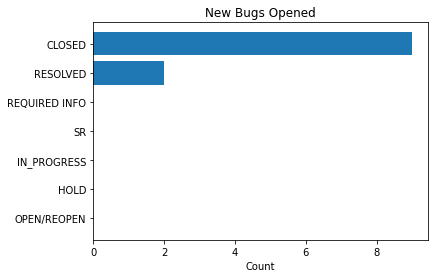

In [252]:
statuses = ['OPEN', 'IN_PROGRESS', 'Required Info', 'RESOLVED', 'HOLD', 'SR RAISED', 'CLOSED']
components = ['Xstore', 'MOM', 'SIM', 'ORCE', 'StoreHub', 'Fusion']
df_new_bugs_opened = df_report[(df_report['Opened'] >= time_frame[0]) & (df_report['Opened'] <= time_frame[1])]
df_new_bugs_opened.reset_index(drop = True, inplace = True)
df_new_bugs_opened = df_new_bugs_opened[['Component', 'Status', 'Opened', 'Type']]
df_new_bugs_opened = df_new_bugs_opened.groupby(['Component', 'Status']).agg('count')
print(df_new_bugs_opened)
df = pd.DataFrame(index = components, columns = statuses)
for component in components:
    for status in statuses:
        if (component, status) in df_new_bugs_opened.index:
            df.loc[component][status] = df_new_bugs_opened.loc[component].loc[status]['Opened']
        else:
            df.loc[component][status] = 0
df['Bug Count'] = df.sum(axis = 1).astype('int')
df.loc['Total'] = df.sum(axis = 0)
# print(df)
df_graph = df.drop('Bug Count', axis = 1)
cols = ['CLOSED', 'RESOLVED', 'Required Info', 'SR RAISED', 'IN_PROGRESS', 'HOLD', 'OPEN']
df_graph = df_graph[cols]
df_graph.columns = ['CLOSED', 'RESOLVED', 'REQUIRED INFO', 'SR', 'IN_PROGRESS', 'HOLD', 'OPEN/REOPEN']
fig, ax = plt.subplots()
y_pos = np.arange(len(df_graph.columns))
ax.barh(y_pos, df_graph.loc['Total'])
ax.set_yticks(y_pos, labels = df_graph.columns)
ax.invert_yaxis()
ax.set_xlabel('Count')
ax.set_title('New Bugs Opened')
plt.show()

In [172]:
df_bugs_status = df_report[(df_report['Severity'] == 'Critical') | (df_report['Severity'] == 'Major')]
df_bugs_status = df_bugs_status[(df_bugs_status['Status'] == 'OPEN') | (df_bugs_status['Status'] == 'IN_PROGRESS')]
df_bugs_status = df_bugs_status[df_bugs_status['Type'] != 'CR']
cols = ['Bug ID', 'Component', 'Assignee', 'Status', 'Summary', 'Changed', 'Severity', 'Type']
df_bugs_status = df_bugs_status[cols]
# print(len(df_bugs_status['Assignee']))
for i in range(0, len(df_bugs_status['Assignee'])):
    df_bugs_status['Assignee'].iloc[i] = df_bugs_status['Assignee'].iloc[i].split('.')[0].capitalize()
df_bugs_status.reset_index(drop = True, inplace = True)
df_bugs_status

Bug ID Component Assignee       Status                         Summary  \
0   48965       MOM    Erick  IN_PROGRESS  Ordenes de compras automáticas   

              Changed  Severity Type  
0 2022-01-20 18:27:18  Critical  Bug

In [241]:
df_bugs_sinsa = df_report.copy()
company = []
assignee = []
for i in range(0, len(df_bugs_sinsa['Assignee'])):
    company.append(df_bugs_sinsa['Assignee'].iloc[i].split('@')[1])
    assignee.append(df_bugs_sinsa['Assignee'].iloc[i].split('.')[0].capitalize())
df_bugs_sinsa['Company'] = company
df_bugs_sinsa['Assignee'] = assignee
df_bugs_sinsa = df_bugs_sinsa[(df_bugs_sinsa['Company'] == 'sinsa.com.ni') & (df_bugs_sinsa['Type'] != 'CR') & ((df_bugs_sinsa['Status'] != 'RESOLVED') & (df_bugs_sinsa['Status'] != 'CLOSED') & (df_bugs_sinsa['Status'] != 'SR RAISED'))]
days_in_sinsa = []
for i in range(0, len(df_bugs_sinsa['Opened'])):
    days_in_sinsa.append(pd.to_datetime(pd.Timestamp.now()) - df_bugs_sinsa['Changed'].iloc[i])
df_bugs_sinsa['Number of days in Sinsa side'] = days_in_sinsa
df_bugs_sinsa['Number of days in Sinsa side'] = df_bugs_sinsa['Number of days in Sinsa side'].dt.days
cols = ['Bug ID', 'Component', 'Summary', 'Assignee', 'Status', 'Severity', 'Changed', 'Number of days in Sinsa side']
df_bugs_sinsa = df_bugs_sinsa[cols]
df_bugs_sinsa['Changed'] = df_bugs_sinsa['Changed'].dt.floor('D')
df_bugs_sinsa['Changed'] = df_bugs_sinsa['Changed'].dt.strftime('%m-%d-%Y')
df_bugs_sinsa.sort_values(by = ['Number of days in Sinsa side'], inplace = True, ascending = False)
df_bugs_sinsa.reset_index(drop = True, inplace = True)
df_bugs_sinsa

Bug ID Component                                            Summary  \
0    44790    Xstore   1.4.8 build deployment failure from xenvironment   
1    45345    Xstore             Store 15 register 26 xenv not starting   
2    37465    Xstore                                    Sistema Offline   
3    47669       MOM  Store 24 reg 17 -Repliaction issue for July an...   
4    48939       MOM     Proceso para deshabilitar bodegas en RMS y sim   
5    47498    Xstore                      impuesto duplicado en factura   
6    45991       MOM  Items from Ceramica and Ferreteria WH which ar...   
7    48965       MOM                     Ordenes de compras automáticas   
8    38200      ORCE      Clientes existentes en xstore pero no en ORCE   
9    49100    Xstore              Resgistradora no imprime el end count   
10   49062    Xstore                  Error en transacciones con credex   
11   49155       MOM       Ordenes estan llegando a SAF  a las 12:00 am   
12   49301    Xstore  Order 0005003037949 - Error while processing t...   
13   49222       MOM              Transaction Corrections In SIM_FEB-22   

   Assignee         Status  Severity     Changed  Number of days in Sinsa side  
0     Ruddy           HOLD  Critical  11-27-2020                           469  
1     Ruddy           HOLD    Normal  03-18-2021                           357  
2     Ruddy           HOLD    Normal  06-18-2021                           265  
3     Erick         REOPEN    Normal  11-01-2021                           129  
4     Erick    IN_PROGRESS    Normal  01-12-2022                            57  
5   Armando           HOLD    Normal  01-15-2022                            54  
6   Armando         REOPEN    Normal  01-18-2022                            51  
7     Erick    IN_PROGRESS  Critical  01-20-2022                            49  
8     Erick           HOLD    Normal  01-24-2022                            45  
9     Erick  Required Info     Major  02-03-2022                            35  
10    Erick    IN_PROGRESS    Normal  02-04-2022                            34  
11    Erick  Required Info  Critical  02-21-2022                            17  
12    Erick  Required Info    Normal  03-02-2022                             8  
13     Juan    IN_PROGRESS    Normal  03-03-2022                             7

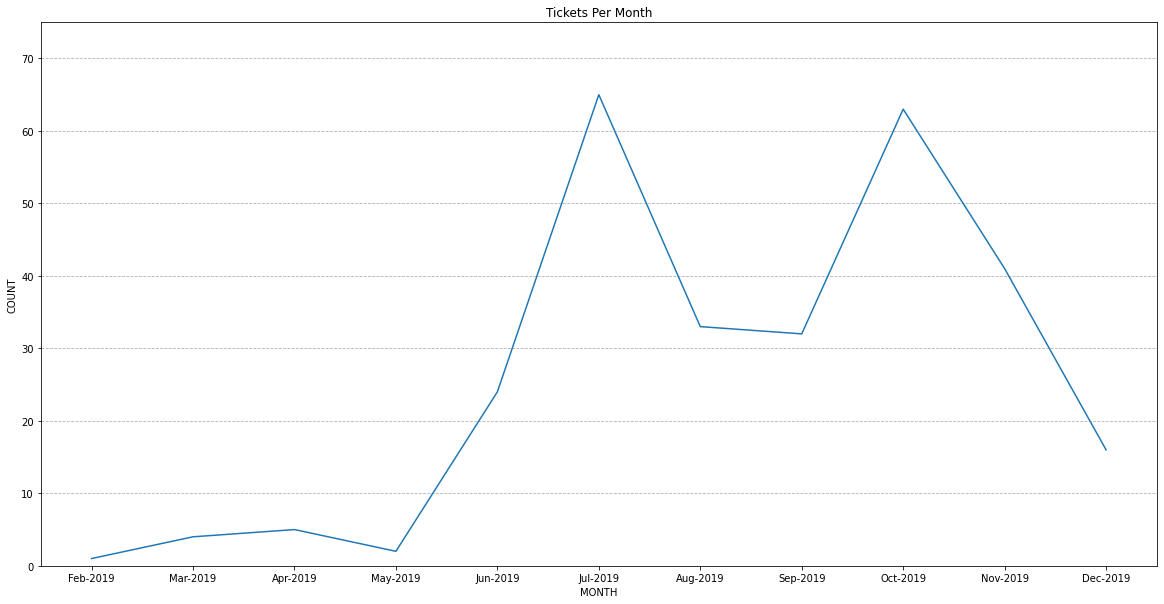

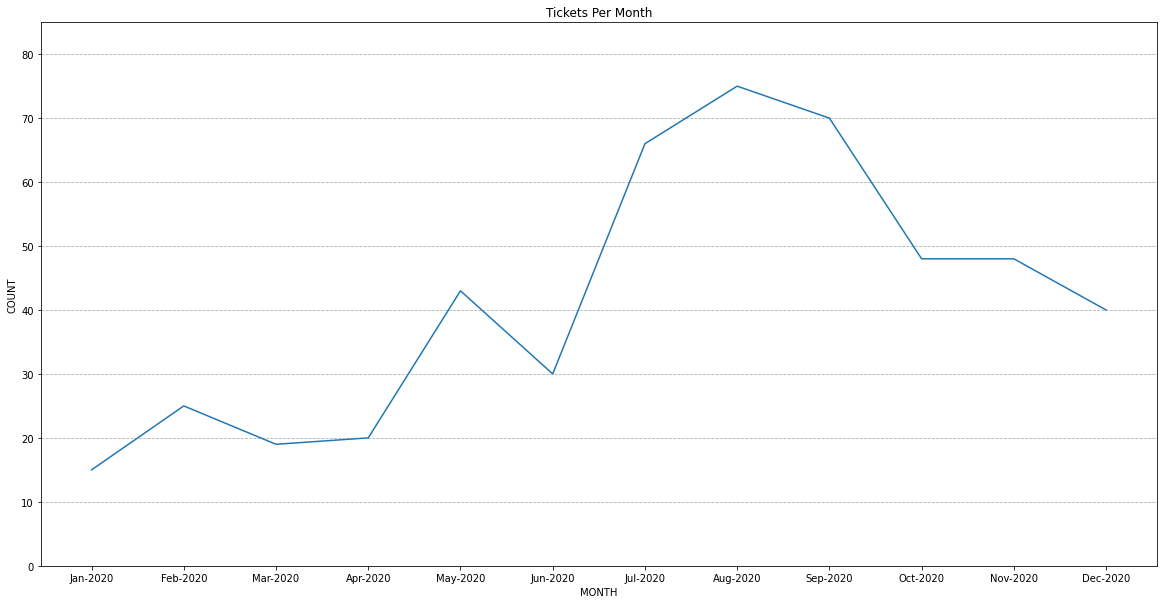

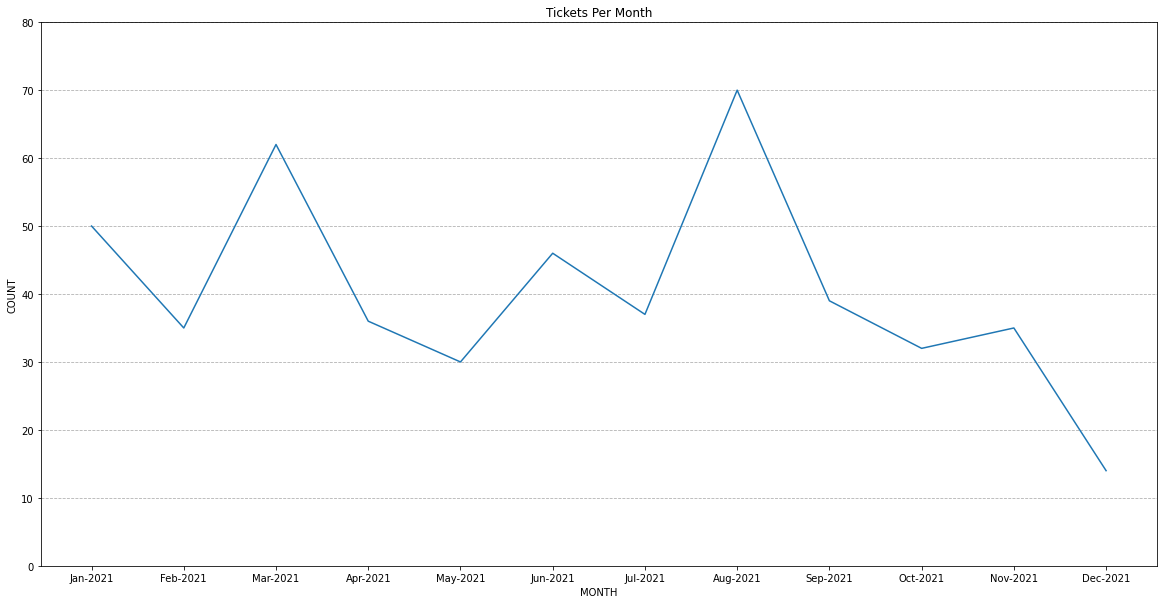

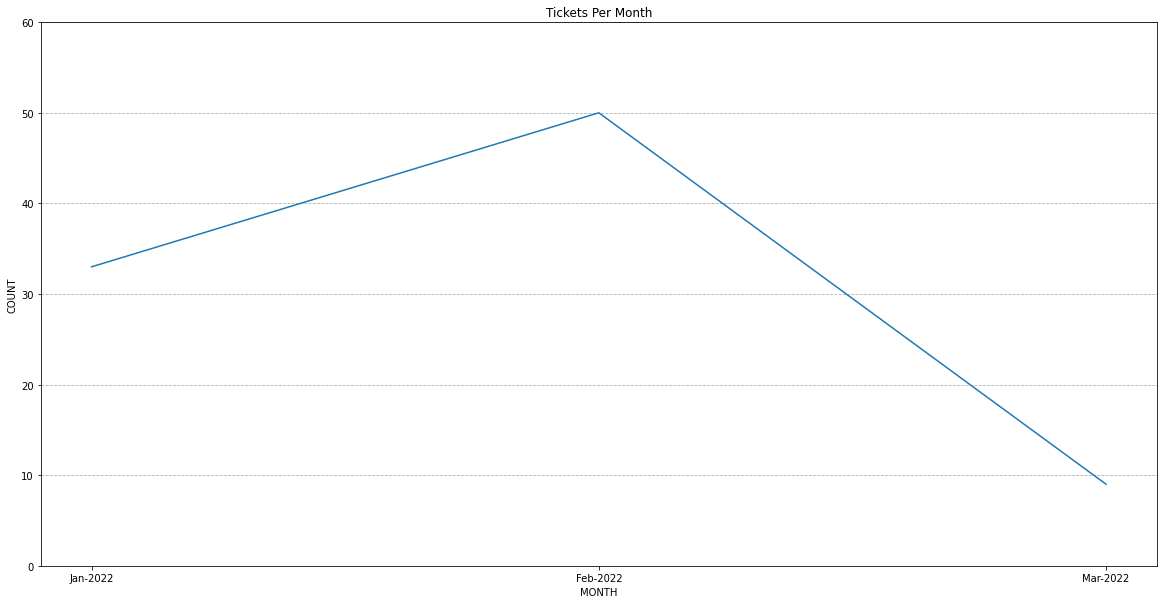

In [321]:
df_ticket_trend = df_report.copy()
df_ticket_trend['Opened'] = df_ticket_trend['Opened'].dt.floor('D')
df_ticket_trend['Opened'] = df_ticket_trend['Opened'].dt.strftime('%Y-%m')
df_ticket_trend = df_ticket_trend.groupby('Opened').agg('count')
df_ticket_trend = df_ticket_trend[['Bug ID']]
df_ticket_trend.columns = ['Total Tickets Assigned']
df_ticket_trend_yearly = []
temp = []
year_prev = df_ticket_trend.index[0].split('-')[0]
for i in range(0, len(df_ticket_trend)):
    year = df_ticket_trend.index[i].split('-')[0]
    month = calendar.month_name[int(df_ticket_trend.index[i].split('-')[1])][0:3]
    if year_prev == year:
        temp.append([month + '-' + year, df_ticket_trend.iloc[i]['Total Tickets Assigned']])
        if i == len(df_ticket_trend) - 1:
            df_ticket_trend_yearly.append(temp)
    else:
        df_ticket_trend_yearly.append(temp)
        temp = []
        temp.append([month + '-' + year, df_ticket_trend.iloc[i]['Total Tickets Assigned']])
        year_prev = year
for i in range(0, len(df_ticket_trend_yearly)):
    df_ticket_trend_yearly[i] = pd.DataFrame(df_ticket_trend_yearly[i], columns = ['MONTH', 'COUNT'])
for i in range(0, len(df_ticket_trend_yearly)):
    plt.figure(figsize=(20, 10))
    plt.ylim(0, max(df_ticket_trend_yearly[i]['COUNT']) + 10)
    plt.plot(df_ticket_trend_yearly[i]['MONTH'], df_ticket_trend_yearly[i]['COUNT'])
    # ax = plt.axes()
    # ax.set_facecolor('black')
    plt.xlabel('MONTH')
    plt.ylabel('COUNT')
    plt.title('Tickets Per Month')
    plt.grid(True, axis = 'y', linestyle = '--')
    plt.show()

In [344]:
df_category_monthly = df_report.copy()
df_category_monthly['Opened'] = df_category_monthly['Opened'].dt.floor('D')
df_category_monthly['Opened'] = df_category_monthly['Opened'].dt.strftime('%Y-%m')
df_category_monthly = df_category_monthly.groupby(['Opened', 'Component']).agg('count')
df_category_monthly = df_category_monthly[['Bug ID']]
# df_category_monthly
df_category_monthly_yearly = []
temp = []
year_prev = df_category_monthly.index[0][0].split('-')[0]
# df_category_monthly.index[2]
for i in range(0, len(df_category_monthly)):
    year = df_category_monthly.index[i][0].split('-')[0]
    month = calendar.month_name[int(df_category_monthly.index[i][0].split('-')[1])][0:3]
    print(year, month, df_category_monthly.index[i][1])
#     if year_prev == year:
#         temp.append([month + '-' + year, df_category_monthly.iloc[i]['Total Tickets Assigned']])
#         if i == len(df_ticket_trend) - 1:
#             df_ticket_trend_yearly.append(temp)
#     else:
#         df_ticket_trend_yearly.append(temp)
#         temp = []
#         temp.append([month + '-' + year, df_ticket_trend.iloc[i]['Total Tickets Assigned']])
#         year_prev = year
# for i in range(0, len(df_ticket_trend_yearly)):
#     df_ticket_trend_yearly[i] = pd.DataFrame(df_ticket_trend_yearly[i], columns = ['MONTH', 'COUNT'])

2019 Feb Xstore
2019 Mar StoreHub
2019 Mar Xstore
2019 Apr StoreHub
2019 Apr Xstore
2019 May MOM
2019 May Xstore
2019 Jun MOM
2019 Jun ORCE
2019 Jun StoreHub
2019 Jun Xstore
2019 Jul Fusion
2019 Jul MOM
2019 Jul SIM
2019 Jul StoreHub
2019 Jul Xstore
2019 Aug MOM
2019 Aug ORCE
2019 Aug SIM
2019 Aug StoreHub
2019 Aug Xstore
2019 Sep MOM
2019 Sep ORCE
2019 Sep SIM
2019 Sep StoreHub
2019 Sep Xstore
2019 Oct Fusion
2019 Oct MOM
2019 Oct SIM
2019 Oct StoreHub
2019 Oct Xstore
2019 Nov MOM
2019 Nov StoreHub
2019 Nov Xstore
2019 Dec MOM
2019 Dec ORCE
2019 Dec SIM
2019 Dec Xstore
2020 Jan MOM
2020 Jan SIM
2020 Jan Xstore
2020 Feb MOM
2020 Feb SIM
2020 Feb StoreHub
2020 Feb Xstore
2020 Mar MOM
2020 Mar ORCE
2020 Mar SIM
2020 Mar Xstore
2020 Apr MOM
2020 Apr ORCE
2020 Apr SIM
2020 Apr StoreHub
2020 Apr Xstore
2020 May MOM
2020 May SIM
2020 May StoreHub
2020 May Xstore
2020 Jun MOM
2020 Jun ORCE
2020 Jun SIM
2020 Jun Xstore
2020 Jul MOM
2020 Jul SIM
2020 Jul StoreHub
2020 Jul Xstore
2020 Aug Fusion

In [323]:
df_severity_monthly = df_report.copy()
df_severity_monthly

Bug ID               Product Component  \
0      49429  Sinsa Steady Support       MOM   
1      49428  Sinsa Steady Support    Xstore   
2      49427  Sinsa Steady Support    Xstore   
3      49405  Sinsa Steady Support    Xstore   
4      49393  Sinsa Steady Support    Xstore   
...      ...                   ...       ...   
1358   36245  Sinsa Steady Support    Xstore   
1359   36145  Sinsa Steady Support    Xstore   
1360   35562  Sinsa Steady Support  StoreHub   
1361   35189  Sinsa Steady Support    Xstore   
1362   34930  Sinsa Steady Support    Xstore   

                                                Summary  \
0             MOM esta enviando cuenta errónea a fusion   
1                           Store unable to send quotes   
2                           Store unable to send quotes   
3                              consume file on store 15   
4               Store 24 - Unable to process quotations   
...                                                 ...   
1358  Se estan agregando atributos de clientes a cie...   
1359  Campo de exoneracion no pemite ingresar todos ...   
1360            Columna CODIGO en SINSA_INVART_STG NULL   
1361                Error en el POS ( Error in the POS)   
1362  Transactions failing in ReSA with 'TITEM_QTY_S...   

                                Assignee       Status Resolution  \
0      pallavi.deshpande@skillnetinc.com  IN_PROGRESS        ---   
1     riddhipratim.mitra@skillnetinc.com       CLOSED        ---   
2     riddhipratim.mitra@skillnetinc.com         OPEN        ---   
3     riddhipratim.mitra@skillnetinc.com       CLOSED        ---   
4           niket.jogale@skillnetinc.com       CLOSED        ---   
...                                  ...          ...        ...   
1358         erick.martinez@sinsa.com.ni       CLOSED        ---   
1359      gaurav.thosani@skillnetinc.com       REOPEN        ---   
1360       abhilash.nair@skillnetinc.com       CLOSED        ---   
1361       oscar.escobar@skillnetinc.com    SR RAISED        ---   
1362        namrata.jain@skillnetinc.com       CLOSED        ---   

                  Opened             Changed      Type  Severity Priority  
0    2022-03-09 01:09:26 2022-03-09 01:22:38  Incident    Normal   Normal  
1    2022-03-09 00:48:28 2022-03-09 00:50:14  Incident    Normal   Normal  
2    2022-03-09 00:48:28 2022-03-09 00:48:28       Bug    Normal   Normal  
3    2022-03-08 00:40:27 2022-03-08 00:41:08  Incident    Normal   Normal  
4    2022-03-05 05:14:45 2022-03-05 05:16:18  Incident    Normal   Normal  
...                  ...                 ...       ...       ...      ...  
1358 2019-03-19 22:40:11 2021-02-03 23:58:16  Incident    Normal  Highest  
1359 2019-03-12 22:12:41 2021-01-13 00:20:24        CR     Major     High  
1360 2019-03-07 20:20:25 2021-02-02 16:02:14       Bug    Normal   Normal  
1361 2019-03-01 19:59:22 2021-06-09 21:14:40       Bug  Critical     High  
1362 2019-02-27 16:30:01 2021-03-10 00:06:05       Bug     Major     High  

[1363 rows x 12 columns]